# DEFI PROJECT- 

##### Chakravarti Raghavan's Defi Total Value Locked and Automated Market Maker Trade data analysis

#### Import libraries needed

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
from datetime import date, timedelta
from cryptocmd import CmcScraper
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load .env enviroment variables
load_dotenv()

True

#### Set API key

In [4]:
defipulse_api_key = os.getenv("DATA_DEFI_PULSE_KEY")

In [5]:
#defipulse_api_key

In [6]:
defipulse_url = f"https://data-api.defipulse.com/api/v1/defipulse/api/MarketData?api-key={defipulse_api_key}"
defipulse_eth_gas_url2 = f"https://data-api.defipulse.com/api/v1/egs/api/ethgasAPI.json?api-key={defipulse_api_key}"
defi_exchanges_url = f"https://data-api.defipulse.com/api/v1/blocklytics/pools/v1/exchanges?api-key={defipulse_api_key}"


In [7]:
defi_history_response_data = requests.get(defipulse_url).json()
defi_exchanges_response_data = requests.get(defi_exchanges_url).json()
#defi_eth_gas_response_data = requests.get(defipulse_eth_gas_url2).json()
#defi_history_response_data2 = requests.get(https://data-api.defipulse.com/api/v1/defipulse/api/GetHistory?

#### This TVL history stopped working with Internal Error 500 since couple days. I had already taken the basic HVplots and also had fortunately downloaded the dataframe as file. So i could have used this file further for more better analysis if i had more time. 

#### i have posted this error in DeFiPulse Discord group and they were able to reproduce that error and they are looking into this.

In [8]:
tvl_history_url = f"https://data-api.defipulse.com/api/v1/defipulse/api/GetHistory?api-key={defipulse_api_key}"
tvl_history_response_data = requests.get(tvl_history_url).json()

In [9]:
#print(defi_history_response_data)
#print(len(defi_history_response_data))
#print(type(defi_history_response_data))

In [10]:
print(len(tvl_history_response_data))

1


#### Check the Defi histoy Json

In [11]:
for k, v in defi_history_response_data.items():
    print(k)
#    print(type(k))
    #for k1, v1 in k.items():
    #    print(k1)
    #    print(v1)
#    print(v)
#    print(type(v))
    for k1, v1 in v.items():
        print('    ', k1)
        print('      ',v1)

All
     total
       60160777608
     dominance_name
       Aave
     dominance_value
       9046957828
     value
       {'total': {'USD': {'value': 60160777608}, 'ETH': {'value': 8901557.128355142}, 'BTC': {'value': 174610.08021422997}}, 'balance': {'ERC20': {'DAI': {'value': 2717068469.5003977}}}, 'tvl': {'ETH': {'value': 23232315.365336563}}}
     dominance_pct
       15.037966907523753
Lending
     total
       33263224357
     dominance_name
       Aave
     dominance_value
       9046957828
     value
       {'total': {'USD': {'value': 33263224357}, 'ETH': {'value': 6085875.767647001}, 'BTC': {'value': 105954.10162021}}, 'balance': {'ERC20': {'DAI': {'value': 1741857420.2634442}}}, 'tvl': {'ETH': {'value': 12845274.762987874}}}
     dominance_pct
       27.198078366976276
DEXes
     total
       20460139921
     dominance_name
       Curve Finance
     dominance_value
       7439539302
     value
       {'total': {'USD': {'value': 20460139921}, 'ETH': {'value': 2494333.708832},

In [12]:
tvl_history_response_data

{'error': 'Request failed with status code 500'}

#### analyse the JSON. Since this one API link does not work anymore - Jupyter notebook has some errors now.

In [11]:
print(type(tvl_history_response_data))
print(len(tvl_history_response_data))
print(tvl_history_response_data[0])
print(type(tvl_history_response_data))
line1 = tvl_history_response_data[0]

<class 'dict'>
1


KeyError: 0

In [12]:
print(type(line1))
# for k,v in line1.items():
#     prin

NameError: name 'line1' is not defined

#### Analyse the timestamp from DefiPulse

In [15]:
print(line1['timestamp'])
print(type(line1['timestamp']))

1623031200
<class 'str'>


#### convert to datetime

In [16]:
line1_date = pd.to_datetime(line1['timestamp'],unit='s')
line1_date

Timestamp('2021-06-07 02:00:00')

In [17]:
print(tvl_history_response_data[1])
print(pd.to_datetime(tvl_history_response_data[1]['timestamp'],unit='s'))

{'timestamp': '1623024000', 'tvlUSD': 66225076336, 'tvlETH': 24398134.483762216, 'BTC': 180756.59188391996, 'ETH': 9735790.586339144, 'DAI': 2777137879.5835214}
2021-06-07 00:00:00


#### Construct the dataframe for TVL history

In [18]:
tvl_hist = []
for i in tvl_history_response_data:
    #print(i)
    new_dict = {}
    for k, v in i.items():
        if k == 'timestamp':
            v = pd.to_datetime(v,unit='s')
            #print('  ', k)
            #print(type(v))
            #print('     ',v)
            new_dict[k] = v
            #print(new_dict)
            #tvl_history_response_data.set_value(k,'timestamp',v)
            #print(new_dict)
        else:
            new_dict[k] = v
            #print(new_dict)
            #print('  ', k)
            #print('     ',v)
    tvl_hist.append(new_dict)
    #print(new_dict)
    #for k,v in new_dict

In [19]:
#print(tvl_hist)

#### Set index with datetime and sort it

In [52]:
tvl_hist_df = pd.DataFrame(tvl_hist)
tvl_hist_df.set_index(['timestamp'],inplace=True)

In [53]:
tvl_hist_cross_df = tvl_hist_df.drop(columns=['BTC'])
tvl_hist_cross_df.sort_index()

,DAI,ETH,tvlETH,tvlUSD
timestamp,,,,
2017-08-02 00:00:00,0.000,0.000,0.000,0
2017-08-03 00:00:00,0.000,0.000,0.018,4
2017-08-04 00:00:00,0.000,0.000,0.018,4
2017-08-05 00:00:00,0.000,0.000,0.023,5
2017-08-06 00:00:00,0.000,0.000,0.020,5
2017-08-07 00:00:00,0.000,0.000,0.019,5
2017-08-08 00:00:00,0.000,0.000,0.019,5
2017-08-09 00:00:00,0.000,0.000,0.017,5
2017-08-10 00:00:00,0.000,0.000,0.017,5


#### Check nulls for cleanup

In [54]:
tvl_hist_cross_df.isna().sum()

DAI       0
ETH       0
tvlETH    0
tvlUSD    0
dtype: int64

#### Write dataframe to file

In [55]:
tvl_hist_cross_df.to_csv('tvl_history2.csv', encoding='utf-8')

In [ ]:
#exchange_trades_file_df = pd.read_csv('exchange_trades_3.csv', parse_dates=True, infer_datetime_format=True, index_col='date')

In [56]:
#tvl_hist_df['tvlETH'] = tvl_hist_df['tvlETH'] * 2500

In [57]:
print(tvl_hist_df.head())
print(tvl_hist_df.tail())

                           BTC            DAI         ETH       tvlETH  \
timestamp                                                                
2021-06-07 02:00:00 180948.141 2780826953.891 9707758.566 24282119.867   
2021-06-07 00:00:00 180756.592 2777137879.584 9735790.586 24398134.484   
2021-06-06 00:00:00 179383.293 2758551251.907 9764515.751 24605432.747   
2021-06-05 00:00:00 178974.820 2744148697.208 9707003.437 24466329.463   
2021-06-04 00:00:00 178397.578 2692830305.599 9692450.055 24303452.750   

                          tvlUSD  
timestamp                         
2021-06-07 02:00:00  67827973889  
2021-06-07 00:00:00  66225076336  
2021-06-06 00:00:00  64732710635  
2021-06-05 00:00:00  65825191440  
2021-06-04 00:00:00  69365456633  
            BTC   DAI   ETH  tvlETH  tvlUSD
timestamp                                  
2017-08-06  nan 0.000 0.000   0.020       5
2017-08-05  nan 0.000 0.000   0.023       5
2017-08-04  nan 0.000 0.000   0.018       4
2017-08-03  nan 

#### analyse the histories separately

In [61]:
tvl_usd_df = tvl_hist_df.drop(columns=['tvlETH', 'BTC', 'ETH', 'DAI'])
tvl_eth_df = tvl_hist_df.drop(columns=['tvlUSD', 'BTC', 'ETH', 'DAI'])
tvl_dai_df = tvl_hist_df.drop(columns=['tvlUSD', 'BTC', 'ETH', 'tvlETH'])
eth_df = tvl_hist_df.drop(columns=['tvlUSD', 'BTC', 'DAI', 'tvlETH'])
tvl_comb_df = tvl_hist_df.drop(columns=['BTC', 'ETH'])
tvl_btc_df = tvl_hist_df['BTC']
print(tvl_usd_df.head())
print(tvl_usd_df.tail())
tvl_btc_df.isna().sum()
tvl_btc_df.dropna(inplace=True)

                          tvlUSD
timestamp                       
2021-06-07 02:00:00  67827973889
2021-06-07 00:00:00  66225076336
2021-06-06 00:00:00  64732710635
2021-06-05 00:00:00  65825191440
2021-06-04 00:00:00  69365456633
            tvlUSD
timestamp         
2017-08-06       5
2017-08-05       5
2017-08-04       4
2017-08-03       4
2017-08-02       0


#### suppress scientific notation

In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
tvl_usd_df.hvplot(figsize=(20,10), title = 'Total Value Locked USD',yformatter='%.0f')
                  #yformatter=BasicTickFormatter(use_scientific=False))
#useOffset=False, style='plain'
#plot 
# fig, ax = plt.subplots()
# ax.semilogy(tvl_usd_df.index, tvl_usd_df['tvlUSD'], 'o-')
# ax.set_xlabel("date")
# ax.set_ylabel("USD TVL")
# ax.set_title("Total Value Locked USD")
# ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
# ax.yaxis.get_major_formatter().set_scientific(False)
# ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.rcParams["figure.figsize"] = (20,10)
# fig.tight_layout()
# #plt.show()

:Curve   [timestamp]   (tvlUSD)

#### Generate basic HV plots

#### i have attached the plot images on Gitlab - for each of these

In [35]:
tvl_eth_df.hvplot(figsize=(20,10), title = 'Total Value Locked ETH',yformatter='%.0f')

:Curve   [timestamp]   (tvlETH)

In [38]:
tvl_dai_df.hvplot(figsize=(20,10), title = 'Total Value Locked DAI',yformatter='%.0f')

:Curve   [timestamp]   (DAI)

In [59]:
tvl_btc_df.hvplot(figsize=(20,10),yformatter='%.0f')

:Curve   [timestamp]   (BTC)

In [62]:
eth_df.hvplot(figsize=(20,10), title = 'ETH',yformatter='%.0f')

:Curve   [timestamp]   (ETH)

In [40]:
tvl_comb_df.hvplot(figsize=(20,10), title = 'Total Value Locked',yformatter='%.0f')

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [63]:
tvl_hist_df.hvplot(figsize=(20,10), title = 'Total Value Locked All',yformatter='%.0f')

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [28]:
print(len(defi_exchanges_response_data))
print(type(defi_exchanges_response_data))

2
<class 'dict'>


In [29]:
defi_exchanges_response_data["query"]

{'excludeEmpty': None,
 'limit': None,
 'offset': 0,
 'orderBy': None,
 'platform': None,
 'search': None,
 'tags': None,
 'totalRows': 11498}

In [30]:
defi_exch_resp_list = defi_exchanges_response_data["results"]

####  Analyse the exchange JSON

In [31]:
defi_exch_resp_list[1]

{'assets': [{'address': '0x35bd8472ed2da9eed980e49b8b92ccbcf625adbd',
   'balance': 864187949903.5,
   'name': 'Enreich',
   'symbol': 'ENRH',
   'weight': 0.5},
  {'address': '0xf2bae67cc0b4642b9bc71264cc878598cb0722bd',
   'balance': 921875377061951,
   'name': 'Nicaragua Canal',
   'symbol': 'NICA',
   'weight': 0.5}],
 'exchange': '0x1ff074ddee048d8a4cd87c35057587a75001d17e',
 'ownershipToken': '0x1ff074ddee048d8a4cd87c35057587a75001d17e',
 'platform': 'Uniswap-v2',
 'poolName': 'Uniswap ENRH-NICA',
 'roi': 1.0000000000216918,
 'tags': [],
 'usdLiquidity': 82234424715.74,
 'usdVolume': 0}

In [32]:
print(defi_exch_resp_list[0])
print('XXX')
print(defi_exch_resp_list[0]['assets'])
print('XXX')
print(defi_exch_resp_list[0]['assets'][0]['symbol'])
print(defi_exch_resp_list[0]['assets'][1]['symbol'])
print(defi_exch_resp_list[0]['exchange'])
print(defi_exch_resp_list[0]['ownershipToken'])
print(defi_exch_resp_list[0]['platform'])
print(defi_exch_resp_list[0]['usdLiquidity'])
# print(defi_exch_resp_list[1])
# print('XXX')
# print(defi_exch_resp_list[2])

total_assets = []
for a in defi_exch_resp_list:
    assets = []
    #print(a)
    assets.append(a['assets'][0]['symbol'])
    if len(a['assets']) > 1:
        assets.append(a['assets'][1]['symbol'])
    assets.append(a['exchange'])
    assets.append(a['ownershipToken'])
    assets.append(a['platform'])
    assets.append(a['poolName'])
    assets.append(a['roi'])
    assets.append(a['usdLiquidity'])
    assets.append(a['usdVolume'])
    total_assets.append(assets)


{'assets': [{'address': '0x9d86f93ff837b80032e3fd7b3f8e1aacc25d3d80', 'balance': 940225734399.72, 'name': 'MIR EAEUnion', 'symbol': 'MIRU', 'weight': 0.5}, {'address': '0xb611920d44324655335b5e11ebc9c929faddfbaf', 'balance': 95990621679.6, 'name': 'Lawa USD', 'symbol': 'LAWA', 'weight': 0.5}], 'exchange': '0x245b720bf0b08a709c96580b610fdfaa4d8754cf', 'ownershipToken': '0x245b720bf0b08a709c96580b610fdfaa4d8754cf', 'platform': 'Uniswap-v2', 'poolName': 'Uniswap MIRU-LAWA', 'roi': 0.999999999993383, 'tags': [], 'usdLiquidity': 174820831140.0017, 'usdVolume': 0}
XXX
[{'address': '0x9d86f93ff837b80032e3fd7b3f8e1aacc25d3d80', 'balance': 940225734399.72, 'name': 'MIR EAEUnion', 'symbol': 'MIRU', 'weight': 0.5}, {'address': '0xb611920d44324655335b5e11ebc9c929faddfbaf', 'balance': 95990621679.6, 'name': 'Lawa USD', 'symbol': 'LAWA', 'weight': 0.5}]
XXX
MIRU
LAWA
0x245b720bf0b08a709c96580b610fdfaa4d8754cf
0x245b720bf0b08a709c96580b610fdfaa4d8754cf
Uniswap-v2
174820831140.0017


#### Check total Token pairs with addresses

In [33]:
print(len(total_assets))
total_assets[0:5]

11498


[['MIRU',
  'LAWA',
  '0x245b720bf0b08a709c96580b610fdfaa4d8754cf',
  '0x245b720bf0b08a709c96580b610fdfaa4d8754cf',
  'Uniswap-v2',
  'Uniswap MIRU-LAWA',
  0.999999999993383,
  174820831140.0017,
  0],
 ['ENRH',
  'NICA',
  '0x1ff074ddee048d8a4cd87c35057587a75001d17e',
  '0x1ff074ddee048d8a4cd87c35057587a75001d17e',
  'Uniswap-v2',
  'Uniswap ENRH-NICA',
  1.0000000000216918,
  82234424715.74,
  0],
 ['DAI',
  'USDC',
  '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7',
  '0x6c3f90f043a72fa612cbac8115ee7e52bde6e490',
  'Curve',
  'Curve',
  1.0011920018290874,
  1749622790.8846464,
  19175896.694087982],
 ['HBTC',
  'WBTC',
  '0x4ca9b3063ec5866a4b82e437059d2c43d1be596f',
  '0xb19059ebb43466c323583928285a49f558e572fd',
  'Curve',
  'Curve HBTC',
  1.0003888675449932,
  461013908.914742,
  3269000.5648120064],
 ['WISE',
  'WETH',
  '0x21b8065d10f73ee2e260e5b47d3344d3ced7596e',
  '0x21b8065d10f73ee2e260e5b47d3344d3ced7596e',
  'Uniswap-v2',
  'Uniswap WISE-WETH',
  0.999971030733786,
  284397

In [14]:
#print(len(total_assets))

In [34]:
total_assets_df = pd.DataFrame.from_records(total_assets)

In [35]:
total_assets_df.columns = ['Token1pair', 'Token2pair', 'Exchange','Ownership Token', 'Platform', 'PoolName', 'Roi', 'UsdLiquidity', 'UsdVolume']

In [36]:
#t_df = total_assets_df.rename(columns={"0": "Token1 pair", "1": "Token2 pair", "2": "Exchange", "3": "Ownership Token", "4": "Platform", "5": "PoolName", "6": "Roi", "7": "UsdLiquidity", "8": "UsdVolume"})

In [37]:
#total_assets_df.to_csv("total_assets.csv")

In [114]:
total_assets_df.head()

NameError: name 'total_assets_df' is not defined

In [38]:
total_assets_df.sort_values(by=['UsdLiquidity'], ascending=False, inplace=True)

#### Due to time constraints temporarily hardcoding top 10 liquidity pool addresses

In [39]:
#assets_7_df = total_assets_df.head(10)
assets_7 = ['MATIC', 'AAVE', 'COMP', 'SOL', 'MKR', 'REN', 'LINK', 'ETH', 'UNI']
liq10 = ['0x245b720bf0b08a709c96580b610fdfaa4d8754cf', 
'0x1ff074ddee048d8a4cd87c35057587a75001d17e',
'0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7',
'0x4ca9b3063ec5866a4b82e437059d2c43d1be596f',
'0x21b8065d10f73ee2e260e5b47d3344d3ced7596e',
'0xa5407eae9ba41422680e2e00537571bcc53efbfd',
'0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51',
'0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852',
'0x93054188d876f558f4a66b2ef1d97d16edf0895b',
'0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5',
'0x7fc77b5c7614e1533320ea6ddc2eb61fa00a9714',
'0x59a19d8c652fa0284f44113d0ff9aba70bd46fb4'
]
is_assets7 = total_assets_df.Token1pair.isin(assets_7)
is_liq10 = total_assets_df.Exchange.isin(liq10)
#is_assets7 = total_assets_df['Token1 pair'] == 'MATIC'
#print(is_assets7)
assets_7_df = total_assets_df[is_assets7]
liq10_df = total_assets_df[is_liq10]
#print(assets_7_df.head())
#print(assets_7_df.tail())
len(assets_7_df)
assets_7_df.isna().sum()
assets_7_df.dropna(inplace=True)
len(assets_7_df)
is_liq0 = total_assets_df['UsdLiquidity'] != 0
assets_7_df = assets_7_df[is_liq0]
len(assets_7_df)
is_vol0 = assets_7_df['UsdVolume'] != 0
assets_7_df = assets_7_df[is_vol0]
assets_7_df.sort_values(by=['UsdLiquidity'], ascending=False, inplace=True)

<ipython-input-39-ed62eeeb9785>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assets_7_df.dropna(inplace=True)
<ipython-input-39-ed62eeeb9785>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  assets_7_df = assets_7_df[is_liq0]


In [40]:
#pick10_df = assets_7_df.head(10)
pick10_df = liq10_df.head(10)

#### Top 10 liquidity pool with addresses

In [41]:
#print(len(assets_7_df))
print(len(pick10_df ))
pick10_df.head(10)

10


,Token1pair,Token2pair,Exchange,Ownership Token,Platform,PoolName,Roi,UsdLiquidity,UsdVolume
0,MIRU,LAWA,0x245b720bf0b08a709c96580b610fdfaa4d8754cf,0x245b720bf0b08a709c96580b610fdfaa4d8754cf,Uniswap-v2,Uniswap MIRU-LAWA,1.000000,1.748208e+11,0.000000e+00
1,ENRH,NICA,0x1ff074ddee048d8a4cd87c35057587a75001d17e,0x1ff074ddee048d8a4cd87c35057587a75001d17e,Uniswap-v2,Uniswap ENRH-NICA,1.000000,8.223442e+10,0.000000e+00
2,DAI,USDC,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,Curve,Curve,1.001192,1.749623e+09,1.917590e+07
3,HBTC,WBTC,0x4ca9b3063ec5866a4b82e437059d2c43d1be596f,0xb19059ebb43466c323583928285a49f558e572fd,Curve,Curve HBTC,1.000389,4.610139e+08,3.269001e+06
4,WISE,WETH,0x21b8065d10f73ee2e260e5b47d3344d3ced7596e,0x21b8065d10f73ee2e260e5b47d3344d3ced7596e,Uniswap-v2,Uniswap WISE-WETH,0.999971,2.843975e+08,1.331372e+05
5,DAI,USDC,0xa5407eae9ba41422680e2e00537571bcc53efbfd,0xc25a3a3b969415c80451098fa907ec722572917f,Curve,Curve sUSD,1.001136,2.764301e+08,1.058772e+07
6,yDAI,yUSDC,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,0xdf5e0e81dff6faf3a7e52ba697820c5e32d806a8,Curve,Curve Y,1.005668,2.282256e+08,1.648939e+06
7,WETH,USDT,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,Uniswap-v2,Uniswap WETH-USDT,0.970989,2.095835e+08,5.162910e+07
8,renBTC,WBTC,0x93054188d876f558f4a66b2ef1d97d16edf0895b,0x49849c98ae39fff122806c06791fa73784fb3675,Curve,Curve renBTC,1.000296,2.017489e+08,1.966732e+05
9,WBTC,WETH,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,0.999444,1.990734e+08,2.208895e+06


#### We are able to only get data for 3 days at a time due to limit in API. So constructing a date list to be used every 3 days range

In [42]:
dt = pd.date_range(start='2021-01-01', end='2021-06-01')
dt_list = []
for i in dt:
    idate=pd.to_datetime(i).date()
    #print(dt.index(i))
    #print(idate)
for index, item in enumerate(dt):
    idate=pd.to_datetime(item).date()
    if index % 3 == 0:
        dt_list.append(idate)
        #print(index, idate)
len(dt_list)
dt_list_3 = dt_list[0] + timedelta(2)
print(dt_list_3)
#print(dt_list)

2021-01-03


In [43]:
master_data = pick10_df.values.tolist()

In [44]:
master_data

[['MIRU',
  'LAWA',
  '0x245b720bf0b08a709c96580b610fdfaa4d8754cf',
  '0x245b720bf0b08a709c96580b610fdfaa4d8754cf',
  'Uniswap-v2',
  'Uniswap MIRU-LAWA',
  0.999999999993383,
  174820831140.0017,
  0.0],
 ['ENRH',
  'NICA',
  '0x1ff074ddee048d8a4cd87c35057587a75001d17e',
  '0x1ff074ddee048d8a4cd87c35057587a75001d17e',
  'Uniswap-v2',
  'Uniswap ENRH-NICA',
  1.0000000000216918,
  82234424715.74,
  0.0],
 ['DAI',
  'USDC',
  '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7',
  '0x6c3f90f043a72fa612cbac8115ee7e52bde6e490',
  'Curve',
  'Curve',
  1.0011920018290874,
  1749622790.8846464,
  19175896.694087982],
 ['HBTC',
  'WBTC',
  '0x4ca9b3063ec5866a4b82e437059d2c43d1be596f',
  '0xb19059ebb43466c323583928285a49f558e572fd',
  'Curve',
  'Curve HBTC',
  1.0003888675449932,
  461013908.914742,
  3269000.5648120064],
 ['WISE',
  'WETH',
  '0x21b8065d10f73ee2e260e5b47d3344d3ced7596e',
  '0x21b8065d10f73ee2e260e5b47d3344d3ced7596e',
  'Uniswap-v2',
  'Uniswap WISE-WETH',
  0.999971030733786,
  28

In [45]:
top10_full = []

In [46]:
#top10_full[0]

#### storing the return as markdown to easily refer

##### 'results': [
   {'fromAmount': 5075.498157408873,
   'fromSymbol': 'KNC',
   'fromToken': '0xdd974d5c2e2928dea5f71b9825b8b646686bd200',
   'id': '0x0ccc9d7f2472bdccf44112a09d430a9a896aa6a7dac4103ffb4b1d3aa0a29a17-104',
   'price': 1200.0490047243031,
   'timestamp': '2021-01-03T22:34:25',
   'toAmount': 4.229409080319106,
   'toSymbol': 'WETH',
   'toToken': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   'trader': '0x00e541a6e7d9ab69e9343c9ba357d5f6e367dfc2',
   'transaction': '0x0ccc9d7f2472bdccf44112a09d430a9a896aa6a7dac4103ffb4b1d3aa0a29a17'},

### Commenting below code as API call is expensive and close to running out of credits. So instead stored the data in "exchange_trades_3.csv" and so from now will read that instead

#### Below code for the Top10 list - take each exchange address , then loop through the multiple date range created (as we can read only 3 dates at a time. 

In [47]:
# loop1_cnt=1

# exhanges_f = []
# pool_f = []
# platform_f = []
# from_amt_f = []
# from_token_f = []
# date_f = [] 
# to_amt_f = []
# price_f = []
# from_symbol_f = []
# to_symbol_f = []
# trades_f = []

# data1 = []
# top10_full = []
# #for index, row in pick10_df.iterrows():
# for master in master_data:
#     #print(row['Exchange'])
#     # for each pick run the API 173 times for each date range of 3 days to get data from 1/1/2020 to current.
#     #print(index)
#     #print(row)
#     loop2_cnt=1
#     #print('loop1= ', loop1_cnt)
#     print('loop1 = ', loop1_cnt, 'Master = ', master)
#     for dt in dt_list:
#         from_dt = dt
#         to_dt = dt + timedelta(2)
#         #print(from_dt, ' --- ', to_dt)
#         #print('Exhange = ',row['Exchange'])
#         #trades_url = f"https://data-api.defipulse.com/api/v1/blocklytics/pools/v1/trades/{row['Exchange']}?to={to_dt}&from={from_dt}&platform=curve&api-key={defipulse_api_key}"
#         trades_url = f"https://data-api.defipulse.com/api/v1/blocklytics/pools/v1/trades/{master[2]}?to={to_dt}&from={from_dt}&platform=curve&api-key={defipulse_api_key}"
#         trades10_response_data = requests.get(trades_url).json()
#         if 'results' not in trades10_response_data:
#             break
#         #tmp_list.append(row)
#         #tmp_list.append(trades10_response_data['results']
#         tmp_list = []
#         #print(type(tmp_list))
#         tmp_list.append(master[0])
#         tmp_list.append(master[1])
#         tmp_list.append(master[2])
#         tmp_list.append(master[3])
#         tmp_list.append(master[4])
#         tmp_list.append(master[5])
#         tmp_list.append(master[6])
#         tmp_list.append(master[7])
#         tmp_list.append(master[8])
#         trades = len(trades10_response_data['results'])
#         tmp_list.append(to_dt)
#         from_amt = 0
#         for hist in trades10_response_data['results']:
#             from_amt = from_amt + hist['fromAmount']
#             exhanges_f.append(master[2])
#             platform_f.append(master[4])
#             pool_f.append(master[5])
#             date_f.append(to_dt)
#             from_amt_f.append(hist['fromAmount'])
#             to_amt_f.append(hist['toAmount'])
#             from_symbol_f.append(hist['fromSymbol'])
#             to_symbol_f.append(hist['toSymbol'])
#             price_f.append(hist['price'])
#             trades_f.append(trades)
#         #print('amt = ' , from_amt)
#         #tmp_list.append(amt)
#         #top10_full.append(tmp_list)
#         if loop2_cnt == 1:
#             data1 = trades10_response_data
#         #if loop2_cnt > 4:
#             #break
#         loop2_cnt = loop2_cnt + 1
#     loop1_cnt = loop1_cnt + 1
#     #if loop1_cnt > 5:
#             #break
# #         for hist in trades10_response_data['results']:
# #             #print('****')
# #             #print(hist)
# #             tmp_list = []
# #             #print(type(tmp_list))
# #             tmp_list.append(master[0])
# #             tmp_list.append(master[1])
# #             tmp_list.append(master[2])
# #             tmp_list.append(master[3])
# #             tmp_list.append(master[4])
# #             tmp_list.append(master[5])
# #             tmp_list.append(master[6])
# #             tmp_list.append(master[7])
# #             tmp_list.append(master[8])
# #             #tmp_list.append(hist)
# #             #tmp2_list = []
# #             #tmp2_list = list(hist.values())
# #             #print(hist['fromAmount'])
# #             tmp_list.append(hist['fromAmount'])
# #             tmp_time_str = hist['timestamp']
# #             tmp_time_str = tmp_time_str[:10] + ' ' + tmp_time_str[11:]
# #             tmp_time = pd.to_datetime(tmp_time_str)
# #             #top10_full[0][10][:10] + ' ' + top10_full[0][10][11:]
# #             tmp_list.append(tmp_time)
# #             #print(type(hist))
# #             top10_full.append(tmp_list)
# #             #tmp_list.clear()
# #         print('loop2= ', loop2_cnt)
# #         if loop2_cnt > 5:
# #             break
# #         loop2_cnt=loop2_cnt+1
#         #top10_full.append(tmp_list)


loop1 =  1 Master =  ['MIRU', 'LAWA', '0x245b720bf0b08a709c96580b610fdfaa4d8754cf', '0x245b720bf0b08a709c96580b610fdfaa4d8754cf', 'Uniswap-v2', 'Uniswap MIRU-LAWA', 0.999999999993383, 174820831140.0017, 0.0]
loop1 =  2 Master =  ['ENRH', 'NICA', '0x1ff074ddee048d8a4cd87c35057587a75001d17e', '0x1ff074ddee048d8a4cd87c35057587a75001d17e', 'Uniswap-v2', 'Uniswap ENRH-NICA', 1.0000000000216918, 82234424715.74, 0.0]
loop1 =  3 Master =  ['DAI', 'USDC', '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7', '0x6c3f90f043a72fa612cbac8115ee7e52bde6e490', 'Curve', 'Curve', 1.0011920018290874, 1749622790.8846464, 19175896.694087982]
loop1 =  4 Master =  ['HBTC', 'WBTC', '0x4ca9b3063ec5866a4b82e437059d2c43d1be596f', '0xb19059ebb43466c323583928285a49f558e572fd', 'Curve', 'Curve HBTC', 1.0003888675449932, 461013908.914742, 3269000.5648120064]
loop1 =  5 Master =  ['WISE', 'WETH', '0x21b8065d10f73ee2e260e5b47d3344d3ced7596e', '0x21b8065d10f73ee2e260e5b47d3344d3ced7596e', 'Uniswap-v2', 'Uniswap WISE-WETH', 0.9

#### - commenting below cells out due to file read from now

In [48]:
# print(len(platform_f))
# print(len(pool_f))
# print(len(date_f))
# print(len(from_amt_f))
# print(len(to_amt_f))
# print(len(from_symbol_f))
# print(len(to_symbol_f))
# print(len(price_f))
# print(len(trades_f))

142992
142992
142992
142992
142992
142992
142992
142992
142992


##### Commenting out code below as now we get this from file.

In [49]:
# exchange_trades_df = pd.DataFrame({ 'Exchange': exhanges_f,
#             'Platform' :platform_f,
#             'Pool' : pool_f,
#             'date': date_f,
#             'FromAmount': from_amt_f,
#             'ToAmount': to_amt_f,
#             'FromSymbol': from_symbol_f,
#             'ToSymbol': to_symbol_f,
#             'Price': price_f,
#             'Trades': trades_f
                                   
# })

### Write to file

In [57]:
#exchange_trades_df.to_csv('exchange_trades_1.csv')
#exchange_trades_df.to_csv('exchange_trades_3.csv')

In [58]:
#exchange_trades_df.tail()

### Read earlier data from a file going foward. As we cannot call the API again as its too intensive and user account runs out of credit.

In [18]:
exchange_trades_file_df = pd.read_csv('exchange_trades_3.csv', parse_dates=True, infer_datetime_format=True, index_col='date')

In [ ]:
import hvplot.pandas

#### Display Automated market maker trades data in liquidity pools

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(exchange_trades_file_df.head())
exchange_trades_file_df.tail(25)

                                              Exchange  Platform  \
date                                                               
2021-01-03  0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5  Balancer   
2021-01-03  0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5  Balancer   
2021-01-03  0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5  Balancer   
2021-01-03  0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5  Balancer   
2021-01-03  0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5  Balancer   

                          Pool  FromAmount  ToAmount FromSymbol ToSymbol  \
date                                                                       
2021-01-03  Balancer WBTC-WETH      34.579     1.023       WETH     WBTC   
2021-01-03  Balancer WBTC-WETH      69.343     2.058       WETH     WBTC   
2021-01-03  Balancer WBTC-WETH     103.188     3.057       WETH     WBTC   
2021-01-03  Balancer WBTC-WETH     205.059     6.103       WETH     WBTC   
2021-01-03  Balancer WBTC-WETH     101.019     2.981       WETH    

,Exchange,Platform,Pool,FromAmount,ToAmount,FromSymbol,ToSymbol,Price,Trades
date,,,,,,,,,
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,3556211.308,3555924.795,USDT,TUSD,1.000,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,610338.766,610376.408,USDT,TUSD,1.000,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,610444.680,610509.173,USDT,TUSD,1.000,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,610334.908,610448.175,USDT,TUSD,1.000,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,610162.120,610275.886,USDT,TUSD,1.000,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,610021.004,610165.623,USDT,TUSD,1.000,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,68704.668,68779.755,DAI,TUSD,1.001,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,271128.122,271353.110,DAI,USDC,1.001,33
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,40000.000,39990.113,USDT,USDC,1.000,33


### There is too many trades each day so also add Month column so we can aggregate at month level. Also for now leaving month as interger number. When there is more time we can give better display

In [20]:
#exchange_trades_file_df.drop(columns=['Un'])
import datetime
exchange_trades_file_df['month'] = pd.DatetimeIndex(exchange_trades_file_df.index).month
exchange_trades_file_df['month'] = exchange_trades_file_df['month'].astype(str)
type(exchange_trades_file_df.index)
#exchange_trades_file_df['month'] = pd.to_datetime(exchange_trades_file_df.index).dt.to_period('M')

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
#exchange_trades_file_df.to_csv('exchange_trades_3_month.csv')

#### display with month

In [22]:
exchange_trades_file_df.head()

,Exchange,Platform,Pool,FromAmount,ToAmount,FromSymbol,ToSymbol,Price,Trades,month
date,,,,,,,,,,
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,34.579,1.023,WETH,WBTC,33.808,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,69.343,2.058,WETH,WBTC,33.697,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,103.188,3.057,WETH,WBTC,33.759,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,205.059,6.103,WETH,WBTC,33.599,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,101.019,2.981,WETH,WBTC,33.883,460,1


#### quick month as text but this will not work since plot will sort by alphabetical name. For now leave as integer

In [23]:
# from time import strptime
# exchange_trades_file_df['month'] = exchange_trades_file_df['month'].apply(lambda x: strptime(x,'%b').tm_mon) 
#look_up = {'01': 'Jan', '1': 'Jan', '02': 'Feb','2': 'Feb', '03': 'Mar', '3': 'Mar', '04': 'Apr', '4': 'Apr', '05': 'May','5': 'May',
#            '06': 'Jun', '6': 'Jun','07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

#exchange_trades_file_df['month'] = exchange_trades_file_df['month'].apply(lambda x: look_up[x])

In [24]:
exchange_trades_file_df.head()

,Exchange,Platform,Pool,FromAmount,ToAmount,FromSymbol,ToSymbol,Price,Trades,month
date,,,,,,,,,,
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,34.579,1.023,WETH,WBTC,33.808,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,69.343,2.058,WETH,WBTC,33.697,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,103.188,3.057,WETH,WBTC,33.759,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,205.059,6.103,WETH,WBTC,33.599,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,101.019,2.981,WETH,WBTC,33.883,460,1


#### slice just trades

In [25]:
trades_df = exchange_trades_file_df.drop(columns=['FromAmount', 'ToAmount', 'Price'])

In [26]:
#trades_df.sort_index
trades_df.head()

,Exchange,Platform,Pool,FromSymbol,ToSymbol,Trades,month
date,,,,,,,
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1


#### keep tokens separate for even compare

In [27]:
WBTC_df = trades_df[trades_df['ToSymbol'] == 'WBTC']
DAI_df = trades_df[trades_df['ToSymbol'] == 'DAI']
LAWA_df = trades_df[trades_df['ToSymbol'] == 'LAWA']
WETH_df = trades_df[trades_df['ToSymbol'] == 'WETH']
USDT_df = trades_df[trades_df['ToSymbol'] == 'USDT']

In [28]:
WBTC_df.head()

,Exchange,Platform,Pool,FromSymbol,ToSymbol,Trades,month
date,,,,,,,
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,WETH,WBTC,460,1


#### Create separate plots for now. These were on the project slides and will be on the Gitlab

In [34]:
#WBTC_df.groupby(by=['ToSymbol','month']).sum().hvplot(figsize=(20,10), title='Total trades by month for 2021', yformatter='%.0f', rot=90)
plot1 = WBTC_df.groupby(by=['month']).sum().hvplot(figsize=(20,10), title='WBTC Total trades by month for 2021', yformatter='%.0f', rot=90)
plot2 = DAI_df.groupby(by=['month']).sum().hvplot(figsize=(20,10), title='DAI Total trades by month for 2021', yformatter='%.0f', rot=90)
plot3 = LAWA_df.groupby(by=['month']).sum().hvplot(figsize=(20,10), title='LAWA Total trades by month for 2021', yformatter='%.0f', rot=90)
plot4 = WETH_df.groupby(by=['month']).sum().hvplot(figsize=(20,10), title='WETH Total trades by month for 2021', yformatter='%.0f', rot=90)
plot5 = USDT_df.groupby(by=['month']).sum().hvplot(figsize=(20,10), title='USDT Total trades by month for 2021', yformatter='%.0f', rot=90)

In [35]:
plot1

:Curve   [month]   (Trades)

In [36]:
plot2

:Curve   [month]   (Trades)

In [37]:
plot3

:Curve   [month]   (Trades)

In [38]:
plot4

:Curve   [month]   (Trades)

In [40]:
plot5

:Curve   [month]   (Trades)

### Code from below here is not being used.

In [39]:
trades_df.tail()

,Exchange,Platform,Pool,FromSymbol,ToSymbol,Trades,month
date,,,,,,,
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,yUSDC,yTUSD,33,6
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,yDAI,yTUSD,33,6
2021-06-02,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve,Curve Y,yTUSD,yUSDC,33,6
2021-06-02,0x1ff074ddee048d8a4cd87c35057587a75001d17e,Uniswap-v2,Uniswap ENRH-NICA,ENRH,NICA,1,6
2021-06-02,0x245b720bf0b08a709c96580b610fdfaa4d8754cf,Uniswap-v2,Uniswap MIRU-LAWA,MIRU,LAWA,1,6


In [45]:
trade_count_df = trades_df.groupby(by=(['month'])).count()

In [50]:
trade_count_df['Trades'].hvplot(title='Trade counts per month')

:Curve   [month]   (Trades)

In [75]:
trades_df.groupby(by=['ToSymbol','month']).sum().hvplot(figsize=(20,10), title='Total trades by month for 2021', yformatter='%.0f', rot=90)

:Curve   [ToSymbol]   (Trades)

In [84]:
DAI_df = trades_df[trades_df['ToSymbol'] == 'NICA']

In [85]:
DAI_df

,Exchange,Platform,Pool,FromSymbol,ToSymbol,Trades,month
date,,,,,,,


In [67]:
to_amount_df = exchange_trades_file_df.drop(columns=['FromAmount', 'Trades', 'Price'])

In [68]:
to_amount_df.head()

,Exchange,Platform,Pool,ToAmount,FromSymbol,ToSymbol,month
date,,,,,,,
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,1.023,WETH,WBTC,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,2.058,WETH,WBTC,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,3.057,WETH,WBTC,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,6.103,WETH,WBTC,1
2021-01-03,0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5,Balancer,Balancer WBTC-WETH,2.981,WETH,WBTC,1


In [73]:
to_amount_df.groupby(by=['month']).sum().hvplot(figsize=(20,10), title='Total To Amount by month for 2021', yformatter='%.0f')

:Curve   [month]   (ToAmount)

In [65]:
pool_sum_df = exchange_trades_file_df.groupby(by=['Pool']).sum()

In [66]:
pool_sum_df.round(2)
pool_sum_df

,FromAmount,ToAmount,Price,Trades
Pool,,,,
Balancer WBTC-WETH,403860.141,440724.118,164437.859,6342805
Curve,14964261525.446,14958092996.132,41295.783,35434359
Curve HBTC,35227.689,35219.091,2074.556,106031
Curve Y,1884596144.571,1884450532.378,2675.450,288699
Curve renBTC,64271.790,64259.841,6807.061,1056863
Curve sUSD,2013167943.534,2012554202.524,22634.708,22331523
Uniswap ENRH-NICA,87541732919710.984,107225930949838.234,12460.356,212
Uniswap MIRU-LAWA,1103012865.290,9886657714.120,59.969,34
Uniswap WETH-USDT,227091527.157,217422363.476,36495434.699,41000000


In [67]:
platform_sum_df = exchange_trades_file_df.groupby(by=['Platform']).sum()

In [68]:
platform_sum_df.round(2)
platform_sum_df

,FromAmount,ToAmount,Price,Trades
Platform,,,,
Balancer,403860.141,440724.118,164437.859,6342805
Curve,18862125113.031,18855197209.966,75487.557,59217475
Uniswap-v2,87543145133165.094,107236091131026.281,51338320.291,51959026


In [69]:
to_symbol_sum_df = exchange_trades_file_df.groupby(by=['date', 'ToSymbol']).sum()

In [70]:
to_symbol_sum_df

FromAmount      ToAmount    Price   Trades
date       ToSymbol                                              
2021-01-03 DAI      239413202.770 239458450.764  953.297   888128
           HBTC           360.954       360.871   29.993     1470
           TUSD      10794545.640  10794625.872   18.003     5112
           USDC     244714262.014 244556153.578  504.576   468200
           USDT      99588890.829 110667950.370  605.683  1081216
...                           ...           ...      ...      ...
2021-06-02 WBTC          2746.643      1143.358 1497.375    31396
           WETH           223.696      3173.847   12.033    46512
           renBTC         591.657       591.287   29.971     2340
           yTUSD         1010.339      1076.152    3.188       99
           yUSDC         4093.560      3567.263    0.871       33

[535 rows x 4 columns]

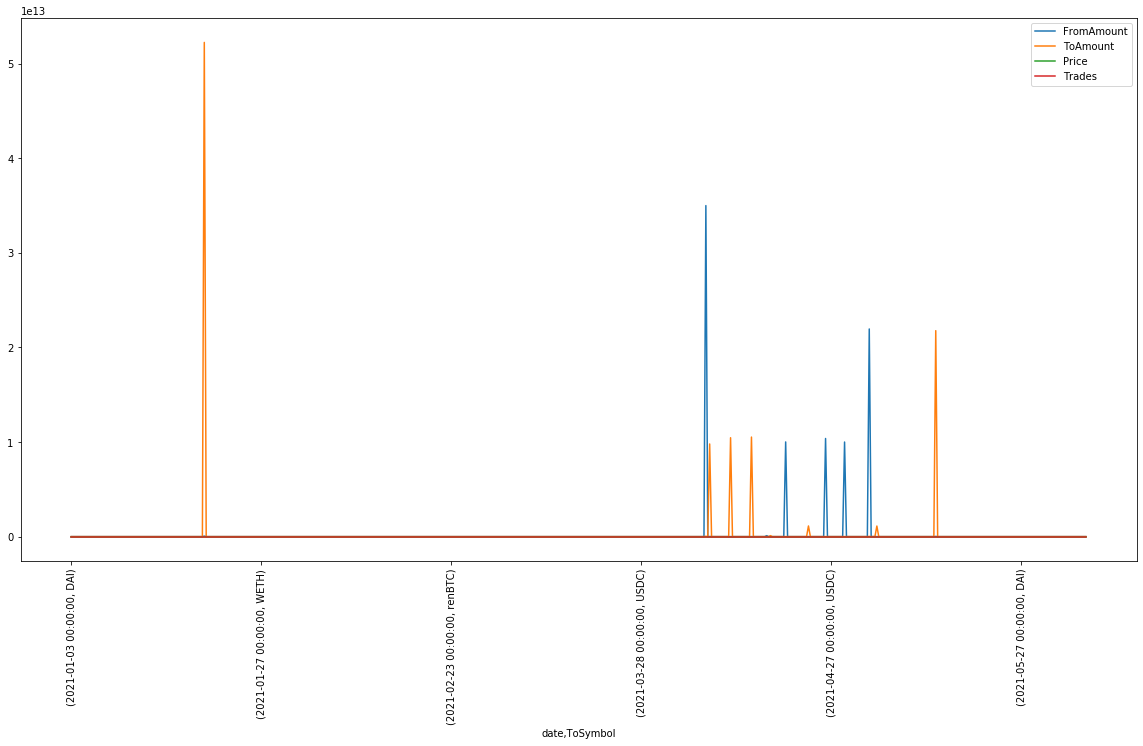

In [71]:
to_symbol_sum_df.plot(rot=90,  figsize=(20,10))

In [145]:
to_symbols = exchange_trades_file_df.ToSymbol.unique()

In [81]:
exchange_trades_file_df.FromSymbol.unique()

array(['MIRU', 'LAWA', 'ENRH', 'NICA', 'USDC', 'DAI', 'USDT', 'HBTC',
       'WBTC', 'WISE', 'WETH', 'sUSD', 'TUSD', 'yTUSD', 'yUSDC', 'yUSDT',
       'yDAI', 'renBTC'], dtype=object)

In [146]:
to_symbols

array(['LAWA', 'MIRU', 'NICA', 'ENRH', 'DAI', 'USDT', 'USDC', 'WBTC',
       'HBTC', 'WETH', 'WISE', 'sUSD', 'TUSD', 'yUSDC', 'yDAI', 'yTUSD',
       'yUSDT', 'renBTC'], dtype=object)

In [153]:
# set scraper for each Coin
scraper=CmcScraper('renBTC',"05-06-2021", "05-06-2021")
scraper=CmcScraper('BTC')
# scrapereth=CmcScraper('ETH')
# scraperada=CmcScraper('ADA')
# scraperlink=CmcScraper('LINK')
# scraperxrp=CmcScraper('XRP')
# for tos in to_symbols:
#     scraper = CmcScraper({tos})
#     scraper.get_dataframe()

In [154]:
#extract the data
btcdata=scraper.get_dataframe()
#headers, data = scraper.get_data()
# ethdata=scrapereth.get_dataframe()
# adadata=scraperada.get_dataframe()
# linkdata=scraperlink.get_dataframe()
# xrpdata=scraperxrp.get_dataframe()

In [155]:
data

[['05-06-2021',
  36951.63609805,
  37936.26857252,
  34979.00689334,
  35555.44558792,
  614614.71,
  353086904.76]]

[['05-06-2021',
  36910.07078411,
  37939.41000999,
  34971.3563788,
  35579.82810664,
  79434803.15,
  6678679878.93]]

In [1]:
exchange_trades_file_df.head(10)

NameError: name 'exchange_trades_file_df' is not defined

In [137]:
#from tradingview_ta import TA_Handler, Interval, Exchange

In [138]:
# tesla = TA_Handler(
#     symbol="BTC",
#     screener="CRYPTO",
#     exchange="UNISWAP",
#     interval=Interval.INTERVAL_1_DAY
# )
# #print(tesla.get_analysis().summary)
# print(type(tesla.get_analysis().indicators))
# print(tesla.get_analysis().indicators['close'])

In [119]:
for index, row in exchange_trades_file_df.iterrows():
    print(row['ToAmount'])
    print(row['ToSymbol'])
    print(index)
    timestampStr = index.strftime("%d-%m-%Y")
    print(timestampStr)
    #scraper=CmcScraper('BTC',"05-06-2021", "05-06-2021")
    scraper=CmcScraper('ADA',timestampStr, timestampStr)
    scr_headers, scr_data = scraper.get_data()
    print(scr_data)
    print(scr_data[0][4])
    usdprice=scr_data[4]*row['ToAmount']
    print(usdprice)
    break

99699.89
LAWA
2021-04-30 00:00:00
30-04-2021
[['30-04-2021', 1.3061959, 1.36904107, 1.28783689, 1.35244901, 2691072833.45, 43208459367.04]]
1.35244901


IndexError: list index out of range

In [ ]:
# loop1_cnt=1

# top10_full = []
# #for index, row in pick10_df.iterrows():
# for master in master_data:
#     #print(row['Exchange'])
#     # for each pick run the API 173 times for each date range of 3 days to get data from 1/1/2020 to current.
#     #print(index)
#     #print(row)
#     loop2_cnt=1
#     print('loop1= ', loop1_cnt)
#     print(master)
#     for dt in dt_list:
#         from_dt = dt
#         to_dt = dt + timedelta(2)
#         #print(from_dt, ' --- ', to_dt)
#         #print('Exhange = ',row['Exchange'])
#         #trades_url = f"https://data-api.defipulse.com/api/v1/blocklytics/pools/v1/trades/{row['Exchange']}?to={to_dt}&from={from_dt}&platform=curve&api-key={defipulse_api_key}"
#         trades_url = f"https://data-api.defipulse.com/api/v1/blocklytics/pools/v1/trades/{master[2]}?to={to_dt}&from={from_dt}&platform=curve&api-key={defipulse_api_key}"
#         trades10_response_data = requests.get(trades_url).json()
#         #tmp_list.append(row)
#         #tmp_list.append(trades10_response_data['results'])
#         for hist in trades10_response_data['results']:
#             #print('****')
#             #print(hist)
#             tmp_list = []
#             #print(type(tmp_list))
#             tmp_list.append(master[0])
#             tmp_list.append(master[1])
#             tmp_list.append(master[2])
#             tmp_list.append(master[3])
#             tmp_list.append(master[4])
#             tmp_list.append(master[5])
#             tmp_list.append(master[6])
#             tmp_list.append(master[7])
#             tmp_list.append(master[8])
#             #tmp_list.append(hist)
#             #tmp2_list = []
#             #tmp2_list = list(hist.values())
#             #print(hist['fromAmount'])
#             tmp_list.append(hist['fromAmount'])
#             tmp_time_str = hist['timestamp']
#             tmp_time_str = tmp_time_str[:10] + ' ' + tmp_time_str[11:]
#             tmp_time = pd.to_datetime(tmp_time_str)
#             #top10_full[0][10][:10] + ' ' + top10_full[0][10][11:]
#             tmp_list.append(tmp_time)
#             #print(type(hist))
#             top10_full.append(tmp_list)
#             #tmp_list.clear()
#         print('loop2= ', loop2_cnt)
#         if loop2_cnt > 5:
#             break
#         loop2_cnt=loop2_cnt+1
#     #top10_full.append(tmp_list)
#     if loop1_cnt > 4:
#         break
#     loop1_cnt = loop1_cnt + 1

In [ ]:
#top10_full[1]

In [ ]:
#data1

##### Issue - ValueError: view limit minimum -1331468.8145 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

##### Issue - we have data like every few seconds. 